# K-Nearest Neighbors for stroke prediction
### Import data

In [46]:
# Import data with our data_processing function
from data_processing import prepare_data, split_data

# Make the data into a pd dataframe
df = prepare_data('healthcare-dataset-stroke-data.csv')

# Split the data into training, testing and validation data
train_data, test_data, val_data, train_labels, test_labels, val_labels = split_data(df, (0.6, 0.2, 0.2))


## The K-Nearest Neighbor classification model


In [57]:
# K-Nearest Neighbour algorithm for classification of test data, with all data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Model training:
def train_and_predict(training_data, training_labels, testing_data, testing_labels, nr_neighbors = "5", weight_metric = "uniform"):
    """
    This function trains a nearest neighbors classifier, with nr_neighbors as the neighbors used for classification and
    a weight metric given as input, standard with every neighbor having the same weight. It outputs the predictions for the 
    testing data.
    """
    # Make an instance of the k-NN model
    knn = KNeighborsClassifier(n_neighbors, weights = weight) 

    # Fit the data to the model
    knn.fit(training_data, training_labels)

    # Predict the classes for the testing data
    predictions = knn.predict(testing_data)
    
    # Determine the accuracy of our model on the testing data
    accuracy = knn.score(testing_data, testing_labels)
    
    # Return predictions and accuracy on testing data
    return predictions, accuracy

# Determine the amount of neighbours the algorithm will consider for the nearest neighbours classification
n_neighbors = 5

# Give the neighbours a weight proportional to their distance to the point being classified
prediction, normal_acc = train_and_predict(train_data, train_labels, test_data, test_labels, n_neighbors, "distance")

print(f"The accuracy on the test data of the k-NN algorithm with k = {n_neighbors} is {normal_acc:.3f}.")

# Confusion matrix:
print("Confusion matrix:")
print(confusion_matrix(test_labels, prediction))

# The data is clearly unbalanced, so accuracy is probably not the best metric; also calculate balanced accuracy
balanced_acc = balanced_accuracy_score(test_labels, prediction)
print(f"The balanced accuracy on the test data of the k-NN algorithm with k = {n_neighbors} is {balanced_acc:.3f}.")

The accuracy on the test data of the k-NN algorithm with k = 5 is 0.939.
Confusion matrix:
[[920  11]
 [ 49   2]]
The balanced accuracy on the test data of the k-NN algorithm with k = 5 is 0.514.


### Plot the data

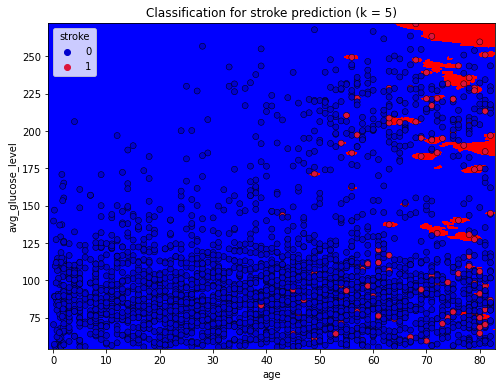

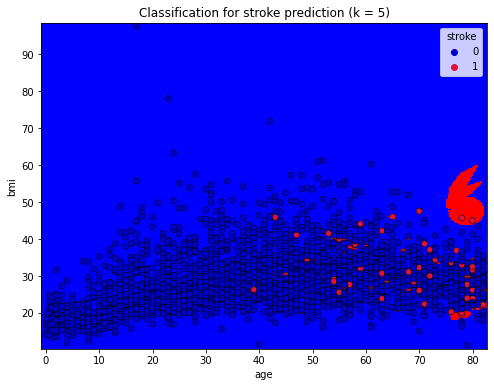

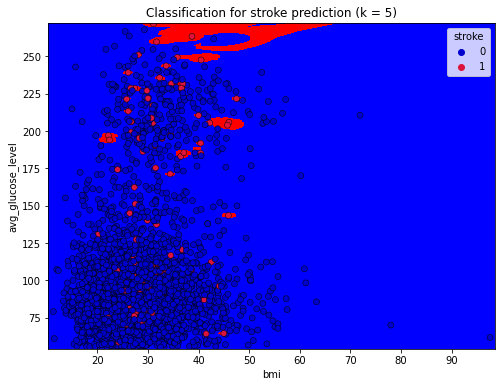

In [69]:
# Plot some features of the k-NN model, just mostly to get a feel for what the data looks like
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

def plot_knn(X, y, n_neighbors = 5):
    """
    This function plots a k Nearest Neighbours model with a 2 features, using a meshgrid. Input is an X matrix with
    feature data and an y vector with class labels. It is possible to set the amount of neighbours that is looked at, default
    = 5.
    """

    # Code for plot by : https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    # Step size in the mesh; determines how precise the patches are plotted
    h = 0.3  

    # Create color maps, colours equal to categories of output data
    cmap_light = ListedColormap(['blue', 'red'])
    # The colormap for the dots in the scatterplot
    cmap_bold = ['MediumBlue', 'Crimson']

    #Create an instance of Neighbours Classifier and fit the data.
    model = KNeighborsClassifier(n_neighbors, weights = weights) 
    model.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points as well
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Classification for stroke prediction (k = {n_neighbors})")

    # Get the names of the x and y axis from the dataframe
    plt.xlabel(f"{X.iloc[:, 0].name}")
    plt.ylabel(f"{X.iloc[:, 1].name}")
    plt.show()

    

# Get two features with continues values to plot; for this we have age, bmi and average glucose level
# Plotting all the features would be too many dimensions, so plot 2 at a time
plot_knn(train_data[["age", "avg_glucose_level"]], train_labels)
plot_knn(train_data[["age", "bmi"]], train_labels)
plot_knn(train_data[["bmi", "avg_glucose_level"]], train_labels)